<a href="https://colab.research.google.com/github/disha2101/1Stop_Internship_Codes/blob/main/Best_Add_Predictor(UCB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps involved are:


1.   Importing Libraries
2.   Importing Dataset
3.   Implement UCB
4.   Visualizing The Result





In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [19]:
#Implementing UCB
N = 1000
d = 10
ads_selected = []
numbers_of_selection = [0]*d
sum_of_rewards = [0]*d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if numbers_of_selection[i] >0:
      average_reward = sum_of_rewards[i]/numbers_of_selection[i]
      delta_i = math.sqrt(3/2* math.log(n+1)/numbers_of_selection[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
    
  ads_selected.append(ad)
  numbers_of_selection[ad] += 1
  reward = dataset.values[n,ad]
  sum_of_rewards[ad]+= reward
  total_reward += reward

Text(0, 0.5, 'No of times each ad was selected')

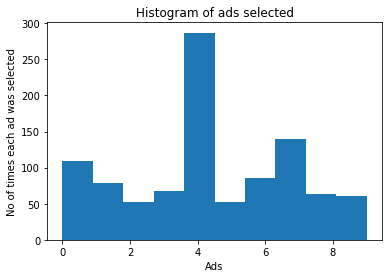

In [20]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("No of times each ad was selected")